<a href="https://colab.research.google.com/github/nurfnick/Metaheuristics/blob/main/Homework8/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
#basic genetic algorithm Python code provided as base code for the DSA/ISE 5113 course
#author: Charles Nicholson
#date: 4/5/2019



#------------------------------------------------------------------------------

#Student name:
#Date:


#need some python libraries
import copy
import math
from random import Random
import numpy as np



#to setup a random number generator, we will specify a "seed" value
#need this for the random number generation -- do not change
seed = 51132023
myPRNG = Random(seed)

#to get a random number between 0 and 1, use this:             myPRNG.random()
#to get a random number between lwrBnd and upprBnd, use this:  myPRNG.uniform(lwrBnd,upprBnd)
#to get a random integer between lwrBnd and upprBnd, use this: myPRNG.randint(lwrBnd,upprBnd)

#number of dimensions in a solution
n = 2

Generations = 500   #number of GA generations

crossOverRate = 0.9  #whether the couple breeds or just continues into next generation
mutationRate = 0.5  #rate at which mutation can occur
eliteSolutions = 4  #number of elite solutions form previous generation that continue on unchanged
mutationFactor = 50 # the largest number by which the mutation can change a random entry

#create the function to evaluate against

def evaluate(x):
  s = 0
  for i in x:
    s+=418.982887272433 - i*np.sin(np.sqrt(abs(i)))

  return s

In [154]:
evaluate([420.9687,420.9687])

5.410356607171707e-10

In [155]:
#create an continuous valued chromosome
def createChromosome(n):
    #this code as-is expects chromosomes to be stored as a list, e.g., x = []
    #write code to generate chromosomes, most likely want this to be randomly generated

    x = []   #i recommend creating the solution as a list
    for i in range(n):
      x.append(myPRNG.uniform(-500,500))
    return x


populationSize = 8 #size of GA population


#create initial population by calling the "createChromosome" function many times and adding each to a list of chromosomes (a.k.a., the "population")
def initializePopulation(): #n is size of population; d is dimensions of chromosome

    population = []
    populationFitness = []

    for i in range(populationSize):
        population.append(createChromosome(n))
        populationFitness.append(evaluate(population[i]))

    tempZip = zip(population, populationFitness)
    popVals = sorted(tempZip, key=lambda tempZip: tempZip[1], reverse = False)

    #the return object is a reversed sorted list of tuples:
    #the first element of the tuple is the chromosome; the second element is the fitness value
    #for example:  popVals[0] is represents the best individual in the population
    #popVals[0] for a 2D problem might be  ([-70.2, 426.1], 483.3)  -- chromosome is the list [-70.2, 426.1] and the fitness is 483.3

    return popVals

In [156]:
pop = initializePopulation()

pop

[([446.14353105779264, 250.54704019124802], 527.4133728145813),
 ([-149.55511712002232, 457.5069782750403], 529.5175755072069),
 ([341.5798881575133, 401.7493665558342], 587.160658515105),
 ([221.67542833548737, 98.15809607258109], 721.5727168785847),
 ([235.9259771456252, 88.35921480816262], 755.2998456833657),
 ([-159.75914916703096, 252.72064983338123], 897.1888728390384),
 ([-62.253387400501026, -159.54732439472906], 910.5154124016872),
 ([-424.9087346323346, -132.76709292353138], 1140.227575574424)]

In [157]:


#implement a crossover
def crossover(x1,x2):
  p = myPRNG.random()
  if crossOverRate>p:
    z = myPRNG.randint(1,n-1)
    offspring1 = x1[:z] + x2[z:]
    offspring2 = x2[:z] + x1[z:]


  else:
    offspring1 = x1[:]
    offspring2 = x2[:]

        #with some probability (i.e., crossoverRate) perform breeding via crossover,
        #i.e. two parents (x1 and x2) should produce two offsrping (offspring1 and offspring2)
        # --- the first part of offspring1 comes from x1, and the second part of offspring1 comes from x2
        # --- the first part of offspring2 comes from x2, and the second part of offspring2 comes from x1

        #if no breeding occurs, then offspring1 and offspring2 can simply be copies of x1 and x2, respectively



  return offspring1, offspring2  #two offspring are returned

child1, child2 = crossover(pop[0][0],pop[1][0])

evaluate(child1)

238.25919031028036

In [158]:



#change anything you like below this line, but keep the gist of the program ------------------------------------

#monitor the number of solutions evaluated
solutionsChecked = 0














#performs tournament selection; k chromosomes are selected (with repeats allowed) and the best advances to the mating pool
#function returns the mating pool with size equal to the initial population
def tournamentSelection(pop,k):

    #randomly select k chromosomes; the best joins the mating pool
    matingPool = []

    while len(matingPool)<populationSize:

        ids = [myPRNG.randint(0,populationSize-1) for i in range(k)]
        competingIndividuals = [pop[i][1] for i in ids]
        bestID=ids[competingIndividuals.index(max(competingIndividuals))]
        matingPool.append(pop[bestID][0])

    return matingPool


def rouletteWheel(pop):

    matingPool = [] #initialize an empty array
    rank = [i/(len(pop)*(len(pop)+1)/2) for i in range(len(pop),0,-1)] #get a probability based on rank
    cumrank = np.cumsum(rank) #needed cummulative probability of those ranks.

    while len(matingPool)<populationSize: #fill up the whole mating pool
      p = myPRNG.random() #get a rando between 0 and 1
      i = 0 #start with the most likely
      while p>cumrank[i]: #grab the random int when finally surpass the p value
        i+=1
      matingPool.append(pop[i][0]) #add it into the pool


    return matingPool


#function to mutate solutions
def mutate(x):

    #create some mutation logic  -- make sure to incorporate "mutationRate" somewhere and dont' do TOO much mutation
    if mutationRate > myPRNG.random():
      i = myPRNG.randint(0,n-1)
      x[i] += mutationFactor*myPRNG.uniform(-1,1)
      if (x[i] > 500) or (x[i]<-500):
        x[i] = 0

    return x






In [159]:
rouletteWheel(pop)

[[446.14353105779264, 250.54704019124802],
 [-149.55511712002232, 457.5069782750403],
 [-149.55511712002232, 457.5069782750403],
 [-149.55511712002232, 457.5069782750403],
 [446.14353105779264, 250.54704019124802],
 [341.5798881575133, 401.7493665558342],
 [-159.75914916703096, 252.72064983338123],
 [341.5798881575133, 401.7493665558342]]

In [160]:
#breeding -- uses the "mating pool" and calls "crossover" function
def breeding(matingPool):
    #the parents will be the first two individuals, then next two, then next two and so on

    children = []
    childrenFitness = []
    for i in range(0,populationSize-1,2):
        child1,child2=crossover(matingPool[i],matingPool[i+1])

        child1=mutate(child1)
        child2=mutate(child2)

        children.append(child1)
        children.append(child2)

        childrenFitness.append(evaluate(child1))
        childrenFitness.append(evaluate(child2))

    tempZip = zip(children, childrenFitness)
    popVals = sorted(tempZip, key=lambda tempZip: tempZip[1], reverse = False)

    #the return object is a sorted list of tuples:
    #the first element of the tuple is the chromosome; the second element is the fitness value
    #for example:  popVals[0] is represents the best individual in the population
    #popVals[0] for a 2D problem might be  ([-70.2, 426.1], 483.3)  -- chromosome is the list [-70.2, 426.1] and the fitness is 483.3

    return popVals

breeding(rouletteWheel(pop))

[([416.1934443364447, 401.7493665558342], 48.266513368955486),
 ([446.14353105779264, 88.35921480816262], 495.04928396766866),
 ([-149.55511712002232, 457.5069782750403], 529.5175755072069),
 ([-149.55511712002232, 457.5069782750403], 529.5175755072069),
 ([-162.61910079873596, 252.72064983338123], 915.5512883437084),
 ([235.9259771456252, 276.0870080673069], 975.108568323125),
 ([341.5798881575133, 250.54704019124802], 990.9171284683437),
 ([-197.90045094804782, 252.72064983338123], 1082.9256723043786)]

In [161]:
#insertion step
def insert(pop,kids):

    #this is not a good solution here... essentially this is replacing the previous generation with the offspring and not implementing any type of elitism
    #at the VERY LEAST evaluate the best solution from "pop" to make sure you are not losing a very good chromosome from last generation
    #maybe want to keep the top 5? 10? solutions from pop -- it's up to you.
    newlist = []
    for i in range(eliteSolutions):
      newlist.append(pop[i])
    for kid in kids:
      newlist.append(kid)
    popVals = sorted(newlist, key=lambda newlist: newlist[1], reverse = False)
    return popVals

insert(pop,breeding(rouletteWheel(pop)))

[([209.56262812767477, 457.5069782750403], 381.3546704337997),
 ([235.9259771456252, 401.7493665558342], 383.9074645770396),
 ([221.67542833548737, 457.5069782750403], 417.0276231701156),
 ([446.14353105779264, 250.54704019124802], 527.4133728145813),
 ([-149.55511712002232, 457.5069782750403], 529.5175755072069),
 ([341.5798881575133, 401.7493665558342], 587.160658515105),
 ([235.9259771456252, 224.34873987038446], 607.9335319896305),
 ([377.030349898097, 88.35921480816262], 633.0416206061122),
 ([221.67542833548737, 98.15809607258109], 721.5727168785847),
 ([-149.55511712002232, 98.15809607258109], 834.0626692156761),
 ([-149.55511712002232, 98.15809607258109], 834.0626692156761),
 ([-159.75914916703096, 134.01377925968183], 961.6867314018095)]

In [162]:






#perform a simple summary on the population: returns the best chromosome fitness, the average population fitness, and the variance of the population fitness
def summaryFitness(pop):
    a=np.array(list(zip(*pop))[1])
    return np.min(a), np.mean(a), np.max(a), np.std(a)


#the best solution should always be the first element...
def bestSolutionInPopulation(pop):
    print ("Best solution: ", pop[0][0])



def main():
    #GA main code
    Population = initializePopulation()



    #optional: you can output results to a file -- i've commented out all of the file out put for now
    #f = open('out.txt', 'w')  #---uncomment this line to create a file for saving output


    for j in range(Generations):

        mates=rouletteWheel(Population)  #<--need to replace this with roulette wheel selection, e.g.:  mates=rouletteWheel(Population)
        Offspring = breeding(mates)
        Population = insert(Population, Offspring)

        #end of GA main code

        maxVal, meanVal, minVal, stdVal=summaryFitness(Population)          #check out the population at each generation
        print("Iteration: ", j, summaryFitness(Population))                 #print to screen; turn this off for faster results

        #f.write(str(minVal) + " " + str(meanVal) + " " + str(varVal) + "\n")  #---uncomment this line to write to  file

    #f.close()   #---uncomment this line to close the file for saving output

    print (summaryFitness(Population))
    bestSolutionInPopulation(Population)


if __name__ == "__main__":
    main()


Iteration:  0 (220.99391461141238, 680.6129055160169, 1256.0772964429411, 307.44611736964737)
Iteration:  1 (220.99391461141238, 557.7980268943405, 1172.4554554913063, 294.9826196450438)
Iteration:  2 (133.12194755527213, 305.70700816902064, 459.6963687673553, 108.68460822826819)
Iteration:  3 (133.12194755527213, 286.2077723467481, 571.4986667810965, 142.1526208026974)
Iteration:  4 (133.12194755527213, 249.54534229884985, 545.2805086331955, 134.59228125748248)
Iteration:  5 (122.55037679349886, 175.70048456024858, 286.4341710729242, 49.86091555976428)
Iteration:  6 (122.55037679349886, 167.70684550267256, 328.0048516025604, 55.141667748472436)
Iteration:  7 (122.55037679349886, 169.30933639640259, 325.53249671071546, 68.15348269208069)
Iteration:  8 (122.55037679349886, 157.52103908445403, 321.689479958952, 62.08571320400347)
Iteration:  9 (122.55037679349886, 156.85903524653344, 360.4270042166042, 73.4261003016112)
Iteration:  10 (122.55037679349886, 141.30234055255877, 232.79141797

In [163]:
Population = initializePopulation()
mates=rouletteWheel(Population)  #<--need to replace this with roulette wheel selection, e.g.:  mates=rouletteWheel(Population)
Offspring = breeding(mates)
Population1 = insert(Population, Offspring)


In [164]:
x = []
y = []
for entry in Population:
  x.append(entry[0][0])
  y.append(entry[0][1])

x1 = []
y1 = []

for entry in Population1:
  x1.append(entry[0][0])
  y1.append(entry[0][1])


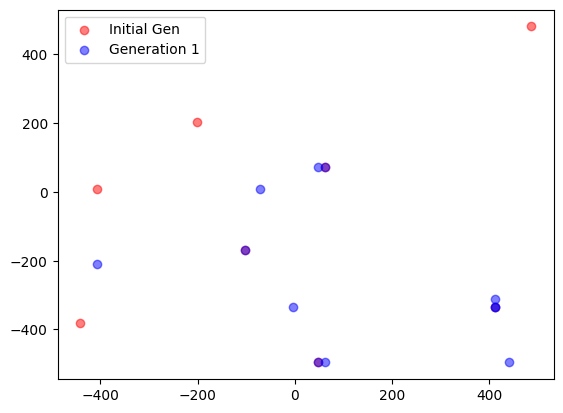

In [165]:
import matplotlib.pyplot as plt

plt.scatter(x,y,c = 'r',alpha = 0.5, label = "Initial Gen")
plt.scatter(x1,y1, c= 'b', alpha = 0.5, label = "Generation 1")
plt.legend()